# 1. Predicting Heart Disease Using a Classification Tree

## 1.1 Data Cleaning

In [12]:
library(tidyverse)   # Incluye dplyr, ggplot2, readr
library(readxl)      # Leer Excel 
library(fastDummies) # para crear dummies de categoricas
library(caret) # para dividir data en train y test
library(tree) # classification tre
library(grf) 

library(randomForest)  # alternativa y para importancia
library(rpart)
library(rpart.plot)
library(scales)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Adjuntando el paquete: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin



Adjuntando el paquete: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




In [2]:
data <- read_csv("C:/Users/VICTOR/Documents/GitHub/Decision_Trees/R/input/processed.cleveland.data", col_names = FALSE)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [37]:
head(data)  

age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [24]:
names(data)

[1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11" "X12"
[13] "X13" "X14"

In [3]:
nombres_nuevos <- c('age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd')
colnames(data) <- nombres_nuevos
names(data)

[1] "age"     "sex"     "cp"      "restbp"  "chol"    "fbs"     "restecg"
 [8] "thalach" "exang"   "oldpeak" "slope"   "ca"      "thal"    "hd"

In [4]:
data <- data %>%
  mutate(across(where(is.character), ~ na_if(., "?")))
data <- data %>%
    drop_na()
data <- data %>%
  mutate(across(everything(), ~ as.numeric(.)))

In [5]:
str(data)

tibble [297 × 14] (S3: tbl_df/tbl/data.frame)
 $ age    : num [1:297] 63 67 67 37 41 56 62 57 63 53 ...
 $ sex    : num [1:297] 1 1 1 1 0 1 0 0 1 1 ...
 $ cp     : num [1:297] 1 4 4 3 2 2 4 4 4 4 ...
 $ restbp : num [1:297] 145 160 120 130 130 120 140 120 130 140 ...
 $ chol   : num [1:297] 233 286 229 250 204 236 268 354 254 203 ...
 $ fbs    : num [1:297] 1 0 0 0 0 0 0 0 0 1 ...
 $ restecg: num [1:297] 2 2 2 0 2 0 2 0 2 2 ...
 $ thalach: num [1:297] 150 108 129 187 172 178 160 163 147 155 ...
 $ exang  : num [1:297] 0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak: num [1:297] 2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope  : num [1:297] 3 2 2 3 1 1 3 1 2 3 ...
 $ ca     : num [1:297] 0 3 2 0 0 0 2 0 1 0 ...
 $ thal   : num [1:297] 6 3 7 3 3 3 3 3 7 7 ...
 $ hd     : num [1:297] 0 2 1 0 0 0 3 0 2 1 ...


### Categoricas a transformar: 
    -cp
    -restecg
    -slope
    -ca
    -thal
    -hd

In [6]:
data <- data %>%
  mutate(y = ifelse(hd > 0, 1, 0))

In [7]:
variables_categoricas = c("cp", "restecg", "slope", "ca", "thal", "hd")
data <- data %>%
  mutate(across(all_of(variables_categoricas), ~ as.factor(.)))
data <- data %>%
    fastDummies::dummy_cols(select_columns = variables_categoricas, 
                              remove_selected_columns = TRUE,
                              remove_first_dummy = TRUE)

## 1.2 Data Analysis

In [8]:
set.seed(123)

train_index <- createDataPartition(data$y, p = 0.8, list = FALSE)
train <- data[train_index, ]
test  <- data[-train_index, ]

train$y <- factor(train$y)
test$y  <- factor(test$y)

tree_model <- tree(y ~ ., data = train)

predictions <- predict(tree_model, test, type = "class")

mean(predictions == test$y)

labels <- c("Does not have HD", "Has HD")
table(Real = factor(test$y, levels = c(0,1), labels = labels),
      Pred = factor(predictions, levels = c(0,1), labels = labels))

confusionMatrix(predictions, test$y,
                dnn = c("Predicho", "Real"),
                mode = "everything",
                positive = "1")

[1] 1

                  Pred
Real               Does not have HD Has HD
  Does not have HD               32      0
  Has HD                          0     27

Confusion Matrix and Statistics

        Real
Predicho  0  1
       0 32  0
       1  0 27
                                     
               Accuracy : 1          
                 95% CI : (0.9394, 1)
    No Information Rate : 0.5424     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
              Precision : 1.0000     
                 Recall : 1.0000     
                     F1 : 1.0000     
             Prevalence : 0.4576     
         Detection Rate : 0.4576     
   Detection Prevalence : 0.4576     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 1          
                                   

> El modelo clasificó perfectamente a todos los individuos: 100% de precisión, sensibilidad y especificidad.

# 2. Causal Forest 

In [25]:
library(tidyverse)

set.seed(123)

# Lectura y renombrado
data <- read_csv("C:/Users/VICTOR/Documents/GitHub/Decision_Trees/R/input/processed.cleveland.data", col_names = FALSE)

nombres_nuevos <- c('age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 
                    'restecg', 'thalach', 'exang', 'oldpeak', 
                    'slope', 'ca', 'thal', 'hd')
colnames(data) <- nombres_nuevos

# Reemplazo de valores faltantes
data <- data %>%
  mutate(across(where(is.character), ~ na_if(., "?"))) %>%
  drop_na() %>%
  mutate(across(everything(), as.numeric))

# Variable binaria de enfermedad
data <- data %>%
  mutate(y = ifelse(hd > 0, 1, 0))

# Variables categóricas
variables_categoricas <- c("cp", "restecg", "slope", "ca", "thal", "hd")
data <- data %>%
  mutate(across(all_of(variables_categoricas), as.factor))

# Variables numéricas
data <- data %>%
  mutate(
    age = as.numeric(age),
    sex = as.numeric(as.character(sex)),
    restbp = as.numeric(restbp),
    oldpeak = as.numeric(oldpeak)
  )

# Tratamiento simulado
n <- nrow(data)
data <- data %>%
  mutate(T = rbinom(n, 1, 0.5))

# Outcome simulado
data <- data %>%
  mutate(
    eps = rnorm(n),
    Y = (1 + 0.05 * age + 0.3 * sex + 0.2 * restbp) * T + 0.5 * oldpeak * eps
  ) %>%
  select(-eps)

# Estimación OLS del efecto promedio
ols_fit <- lm(Y ~ T, data = data)
summary(ols_fit)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Call:
lm(formula = Y ~ T, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1552  -0.7442   0.1079   0.6764  15.7747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.1079     0.2274  -0.475    0.635    
T            30.2439     0.3266  92.604   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.813 on 295 degrees of freedom
Multiple R-squared:  0.9667,	Adjusted R-squared:  0.9666 
F-statistic:  8575 on 1 and 295 DF,  p-value: < 2.2e-16


GRF tree object 
Number of training samples: 148 
Variable splits: 
(1) split_variable: oldpeak  split_value: 2.5 
  (2) split_variable: chol  split_value: 295 
    (4) split_variable: oldpeak  split_value: 1 
      (6) split_variable: restbp  split_value: 120 
        (8) * num_samples: 10  avg_Y: 10.18 avg_W: 0.4 
        (9) * num_samples: 24  avg_Y: 12.62 avg_W: 0.42 
      (7) * num_samples: 20  avg_Y: 11.12 avg_W: 0.4 
    (5) * num_samples: 11  avg_Y: 5.19 avg_W: 0.18 
  (3) * num_samples: 9  avg_Y: 22.43 avg_W: 0.67 


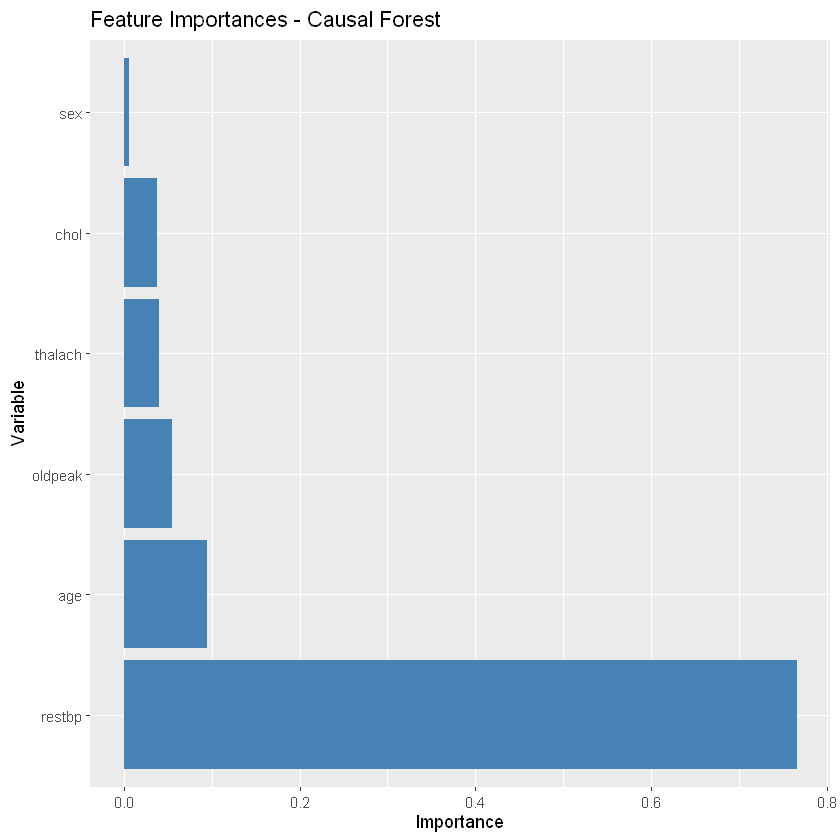

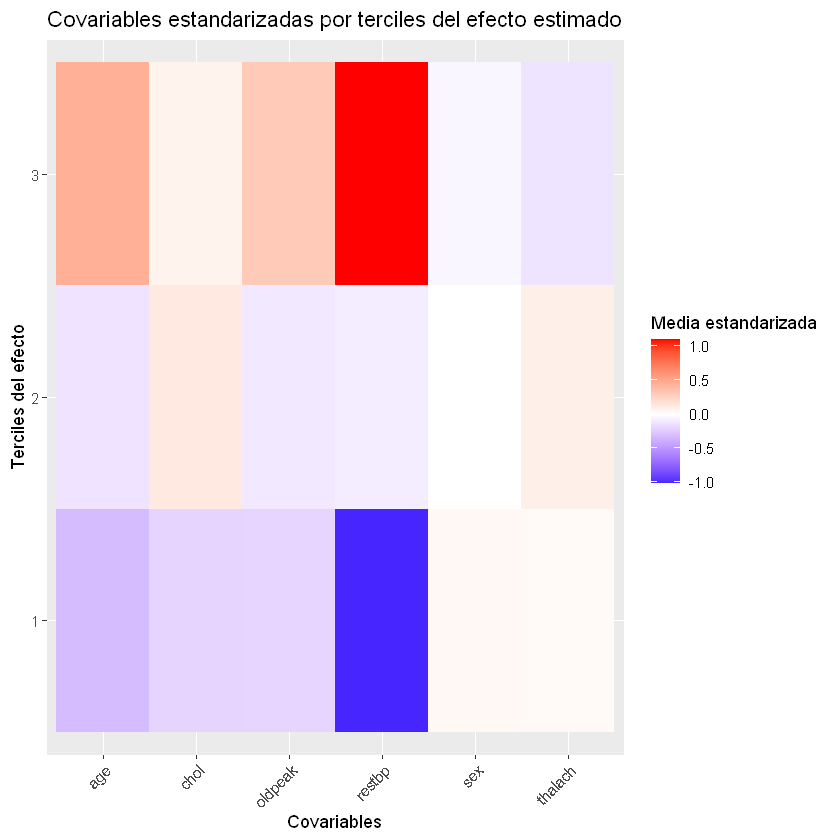

In [27]:
# ============================================================
# 2️⃣ Causal Forest: estimación de efectos heterogéneos
# ============================================================

library(grf)
library(dplyr)
library(ggplot2)
library(forcats)
library(tidyr)
library(scales)

# Seleccionamos las covariables que explican heterogeneidad
X <- data %>%
  select(age, sex, restbp, chol, thalach, oldpeak) %>%
  as.matrix()

Y <- data$Y
W <- data$T

# Entrenamos el Causal Forest
set.seed(123)
cf <- causal_forest(X, Y, W, num.trees = 2000)

# Predicciones: efectos individuales estimados
tau_hat <- predict(cf)$predictions

# ============================================================
# 3️⃣ Árbol representativo (profundidad 2)
# ============================================================

cf_small <- causal_forest(X, Y, W, num.trees = 500)
tree <- get_tree(cf_small, 1)
print(tree)

# ============================================================
# 4️⃣ Importancia de variables
# ============================================================

varimp <- variable_importance(cf)
ranked <- order(varimp, decreasing = TRUE)
importances <- data.frame(
  variable = colnames(X)[ranked],
  importance = varimp[ranked]
)

ggplot(importances, aes(fct_rev(fct_reorder(variable, importance)), importance)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    x = "Variable",
    y = "Importance",
    title = "Feature Importances - Causal Forest"
  )

# ============================================================
# 5️⃣ Covariables estandarizadas por terciles del efecto estimado
# ============================================================

# Estandarizar covariables
X_std <- scale(X) %>% as.data.frame()

# Dividir efectos en terciles
data$tau_tercile <- ntile(tau_hat, 3)

# Calcular medias de covariables en cada tercil
means_by_tercile <- X_std %>%
  mutate(tercile = data$tau_tercile) %>%
  group_by(tercile) %>%
  summarize(across(everything(), mean), .groups = "drop")

# Formato largo para heatmap
heatmap_data <- means_by_tercile %>%
  pivot_longer(-tercile, names_to = "variable", values_to = "mean")

# Heatmap
ggplot(heatmap_data, aes(x = variable, y = factor(tercile), fill = mean)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  labs(
    x = "Covariables",
    y = "Terciles del efecto",
    fill = "Media estandarizada",
    title = "Covariables estandarizadas por terciles del efecto estimado"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
